In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

BASE_URL = "https://www.dubizzle.com.eg/properties/"

def setup_driver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")       
    service = Service("/usr/local/bin/chromedriver")  
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

def scrape_dubizzle(pages=3):
    driver = setup_driver()
    all_properties = []

    for page in range(1, pages+1):
        cur_url = f"{BASE_URL}?page={page}"
        print(f"Scraping page {page} ---> {cur_url}")
        
        try:
            driver.get(cur_url)
            

            WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, "li[aria-label='Listing']"))
            )
            
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            
            listings = soup.find_all("li", {"aria-label": "Listing"})
            for card in listings:
                title = card.select_one("h2").get_text(strip=True) if card.select_one("h2") else ""
                price = card.select_one("div[aria-label='Price'] span").get_text(strip=True) if card.select_one("div[aria-label='Price'] span") else ""
                area = card.select_one("span[aria-label='Area']").get_text(strip=True) if card.select_one("span[aria-label='Area']") else ""
                beds = card.select_one("span[aria-label='Beds']").get_text(strip=True) if card.select_one("span[aria-label='Beds']") else ""
                baths = card.select_one("span[aria-label='Bathrooms']").get_text(strip=True) if card.select_one("span[aria-label='Bathrooms']") else ""
                location = card.select_one("span[aria-label='Location']").get_text(strip=True) if card.select_one("span[aria-label='Location']") else ""
                
                
                all_properties.append({
                    "title": title,
                    "price": price,
                    "area": area,
                    "beds": beds,
                    "baths": baths,
                    "location": location,
                })
                
        except Exception as e:
            print(f"❌ Failed on page {page}: {e}")
            continue
    
    driver.quit()
    return all_properties


properties = scrape_dubizzle(100)



Scraping page 1 ---> https://www.dubizzle.com.eg/properties/?page=1
Scraping page 2 ---> https://www.dubizzle.com.eg/properties/?page=2
Scraping page 3 ---> https://www.dubizzle.com.eg/properties/?page=3
Scraping page 4 ---> https://www.dubizzle.com.eg/properties/?page=4
Scraping page 5 ---> https://www.dubizzle.com.eg/properties/?page=5
Scraping page 6 ---> https://www.dubizzle.com.eg/properties/?page=6
Scraping page 7 ---> https://www.dubizzle.com.eg/properties/?page=7
Scraping page 8 ---> https://www.dubizzle.com.eg/properties/?page=8
Scraping page 9 ---> https://www.dubizzle.com.eg/properties/?page=9
Scraping page 10 ---> https://www.dubizzle.com.eg/properties/?page=10
Scraping page 11 ---> https://www.dubizzle.com.eg/properties/?page=11
Scraping page 12 ---> https://www.dubizzle.com.eg/properties/?page=12
Scraping page 13 ---> https://www.dubizzle.com.eg/properties/?page=13
Scraping page 14 ---> https://www.dubizzle.com.eg/properties/?page=14
Scraping page 15 ---> https://www.dubi

In [19]:
import pandas as pd

In [24]:
df=pd.DataFrame(properties)



In [27]:
df.to_csv("Dubizzle_Properties.csv", index=False, encoding="utf-8-sig")


In [20]:
df=pd.read_csv("Dubizzle_Properties.csv")

## Data Inspection

In [21]:
print(df.shape)

(4500, 6)


In [22]:
df.head()

,title,price,area,beds,baths,location
0,بأرخص سعر شقة 3 غرف استلام فوري جاهزة للسكن و ...,"4,492,000 ج.م",151 متر مربع,3,3,الاشرفية، التجمع الاول•
1,شقة مميزة 225 متر+جاردن استلام فوري للبيع في...,"5,900,000 ج.م",225 متر مربع,4,2,ديار1، 6 أكتوبر•
2,فيلا للبيع في كمبوند قطاميه جاردنز بجوار الجام...,"16,300,000 ج.م",552 متر مربع,6,6,كومباوند قطامية جاردنز، التجمع الخامس•
3,شقة للبيع باقل سعر في ماونتن فيو اي سيتي اكتو...,"4,900,000 ج.م",145 متر مربع,3,3,كومباوند ماونتن فيو اى سيتي، 6 أكتوبر•
4,توين هاوس 364م نص تشطيب للبيع على 26 يوليو داي...,"7,500,000 ج.م",364 متر مربع,3,4,لافيدا، 6 أكتوبر•


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4500 non-null   object
 1   price     4500 non-null   object
 2   area      4500 non-null   object
 3   beds      3896 non-null   object
 4   baths     3895 non-null   object
 5   location  4500 non-null   object
dtypes: object(6)
memory usage: 211.1+ KB


In [24]:
df.isna().sum()

title         0
price         0
area          0
beds        604
baths       605
location      0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(128)

In [25]:
df.nunique()

title       4246
price       1546
area         488
beds          11
baths         11
location     724
dtype: int64

In [26]:
df.describe()

,title,price,area,beds,baths,location
count,4500,4500,4500,3896,3895,4500
unique,4246,1546,488,11,11,724
top,شقه للبيع برايم لوكيشن في قلب العاصمة الاداريه...,"6,000,000 ج.م",150 متر مربع,3,2,مدينتي، القاهرة•
freq,12,56,116,1904,1310,269


In [28]:
print(df.isnull().sum())

title         0
price         0
area          0
beds        604
baths       605
location      0
dtype: int64


## Data Cleaning

In [29]:
# remove ج.م from price

df['price'] = df['price'].str.replace('ج.م','').str.replace(',','').astype(float)


In [30]:
# remove متر مربع from area
df['area'] = df['area'].str.replace('متر مربع','').str.replace(',','').astype(float)


In [31]:
df.head()

,title,price,area,beds,baths,location
0,بأرخص سعر شقة 3 غرف استلام فوري جاهزة للسكن و ...,4492000.0,151.0,3,3,الاشرفية، التجمع الاول•
1,شقة مميزة 225 متر+جاردن استلام فوري للبيع في...,5900000.0,225.0,4,2,ديار1، 6 أكتوبر•
2,فيلا للبيع في كمبوند قطاميه جاردنز بجوار الجام...,16300000.0,552.0,6,6,كومباوند قطامية جاردنز، التجمع الخامس•
3,شقة للبيع باقل سعر في ماونتن فيو اي سيتي اكتو...,4900000.0,145.0,3,3,كومباوند ماونتن فيو اى سيتي، 6 أكتوبر•
4,توين هاوس 364م نص تشطيب للبيع على 26 يوليو داي...,7500000.0,364.0,3,4,لافيدا، 6 أكتوبر•


In [32]:
df[['compound', 'city']] =df['location'].str.split('،', n=1, expand=True)


In [33]:
df.head()

,title,price,area,beds,baths,location,compound,city
0,بأرخص سعر شقة 3 غرف استلام فوري جاهزة للسكن و ...,4492000.0,151.0,3,3,الاشرفية، التجمع الاول•,الاشرفية,التجمع الاول•
1,شقة مميزة 225 متر+جاردن استلام فوري للبيع في...,5900000.0,225.0,4,2,ديار1، 6 أكتوبر•,ديار1,6 أكتوبر•
2,فيلا للبيع في كمبوند قطاميه جاردنز بجوار الجام...,16300000.0,552.0,6,6,كومباوند قطامية جاردنز، التجمع الخامس•,كومباوند قطامية جاردنز,التجمع الخامس•
3,شقة للبيع باقل سعر في ماونتن فيو اي سيتي اكتو...,4900000.0,145.0,3,3,كومباوند ماونتن فيو اى سيتي، 6 أكتوبر•,كومباوند ماونتن فيو اى سيتي,6 أكتوبر•
4,توين هاوس 364م نص تشطيب للبيع على 26 يوليو داي...,7500000.0,364.0,3,4,لافيدا، 6 أكتوبر•,لافيدا,6 أكتوبر•


In [34]:
df['location'] =df['location'].str.replace('•','', regex=False)
df['city'] =df['city'].str.replace('•','', regex=False)


In [35]:
df.head()

,title,price,area,beds,baths,location,compound,city
0,بأرخص سعر شقة 3 غرف استلام فوري جاهزة للسكن و ...,4492000.0,151.0,3,3,الاشرفية، التجمع الاول,الاشرفية,التجمع الاول
1,شقة مميزة 225 متر+جاردن استلام فوري للبيع في...,5900000.0,225.0,4,2,ديار1، 6 أكتوبر,ديار1,6 أكتوبر
2,فيلا للبيع في كمبوند قطاميه جاردنز بجوار الجام...,16300000.0,552.0,6,6,كومباوند قطامية جاردنز، التجمع الخامس,كومباوند قطامية جاردنز,التجمع الخامس
3,شقة للبيع باقل سعر في ماونتن فيو اي سيتي اكتو...,4900000.0,145.0,3,3,كومباوند ماونتن فيو اى سيتي، 6 أكتوبر,كومباوند ماونتن فيو اى سيتي,6 أكتوبر
4,توين هاوس 364م نص تشطيب للبيع على 26 يوليو داي...,7500000.0,364.0,3,4,لافيدا، 6 أكتوبر,لافيدا,6 أكتوبر


In [38]:
import arabic_reshaper
from bidi.algorithm import get_display


# Reshape Arabic text for plotting or display
df['location_display'] = df['location'].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))
df['compound_display'] = df['compound'].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))
df['city_display'] = df['city'].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))



In [39]:
df.head()

,title,price,area,beds,baths,location,compound,city,city_display,location_display,compound_display
0,بأرخص سعر شقة 3 غرف استلام فوري جاهزة للسكن و ...,4492000.0,151.0,3,3,الاشرفية، التجمع الاول,الاشرفية,التجمع الاول,ﻝﻭﻻﺍ ﻊﻤﺠﺘﻟﺍ,ﻝﻭﻻﺍ ﻊﻤﺠﺘﻟﺍ ،ﺔﻴﻓﺮﺷﻻﺍ,ﺔﻴﻓﺮﺷﻻﺍ
1,شقة مميزة 225 متر+جاردن استلام فوري للبيع في...,5900000.0,225.0,4,2,ديار1، 6 أكتوبر,ديار1,6 أكتوبر,ﺮﺑﻮﺘﻛﺃ 6,ﺮﺑﻮﺘﻛﺃ 6 ،1ﺭﺎﻳﺩ,1ﺭﺎﻳﺩ
2,فيلا للبيع في كمبوند قطاميه جاردنز بجوار الجام...,16300000.0,552.0,6,6,كومباوند قطامية جاردنز، التجمع الخامس,كومباوند قطامية جاردنز,التجمع الخامس,ﺲﻣﺎﺨﻟﺍ ﻊﻤﺠﺘﻟﺍ,ﺲﻣﺎﺨﻟﺍ ﻊﻤﺠﺘﻟﺍ ،ﺰﻧﺩﺭﺎﺟ ﺔﻴﻣﺎﻄﻗ ﺪﻧﻭﺎﺒﻣﻮﻛ,ﺰﻧﺩﺭﺎﺟ ﺔﻴﻣﺎﻄﻗ ﺪﻧﻭﺎﺒﻣﻮﻛ
3,شقة للبيع باقل سعر في ماونتن فيو اي سيتي اكتو...,4900000.0,145.0,3,3,كومباوند ماونتن فيو اى سيتي، 6 أكتوبر,كومباوند ماونتن فيو اى سيتي,6 أكتوبر,ﺮﺑﻮﺘﻛﺃ 6,ﺮﺑﻮﺘﻛﺃ 6 ،ﻲﺘﻴﺳ ﻯﺍ ﻮﻴﻓ ﻦﺘﻧﻭﺎﻣ ﺪﻧﻭﺎﺒﻣﻮﻛ,ﻲﺘﻴﺳ ﻯﺍ ﻮﻴﻓ ﻦﺘﻧﻭﺎﻣ ﺪﻧﻭﺎﺒﻣﻮﻛ
4,توين هاوس 364م نص تشطيب للبيع على 26 يوليو داي...,7500000.0,364.0,3,4,لافيدا، 6 أكتوبر,لافيدا,6 أكتوبر,ﺮﺑﻮﺘﻛﺃ 6,ﺮﺑﻮﺘﻛﺃ 6 ،ﺍﺪﻴﻓﻻ,ﺍﺪﻴﻓﻻ


In [40]:
# Fill all missing values with 0 since this is offices, not apartments
df = df.fillna(0)


In [42]:
df = df.drop_duplicates()


In [45]:
df.loc[:, "beds"] = pd.to_numeric(df["beds"], errors="coerce")
df.loc[:, "baths"] = pd.to_numeric(df["baths"], errors="coerce")


In [46]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object = df.select_dtypes(include=['object']).columns.tolist() 
print(numerical)
object

['price', 'area', 'beds', 'baths']


['title',
 'location',
 'compound',
 'city',
 'city_display',
 'location_display',
 'compound_display']

In [47]:
df[numerical].describe()

,price,area,beds,baths
count,4.372000e+03,4372.000000,4369.000000,4371.000000
mean,2.436542e+08,487.020517,2.577707,2.346374
std,1.512536e+10,10198.555164,1.436210,1.461605
min,2.500000e+02,1.000000,0.000000,0.000000
25%,3.250000e+06,116.000000,2.000000,2.000000
50%,7.000000e+06,160.000000,3.000000,2.000000
75%,1.242875e+07,225.000000,3.000000,3.000000
max,1.000000e+12,588000.000000,10.000000,10.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

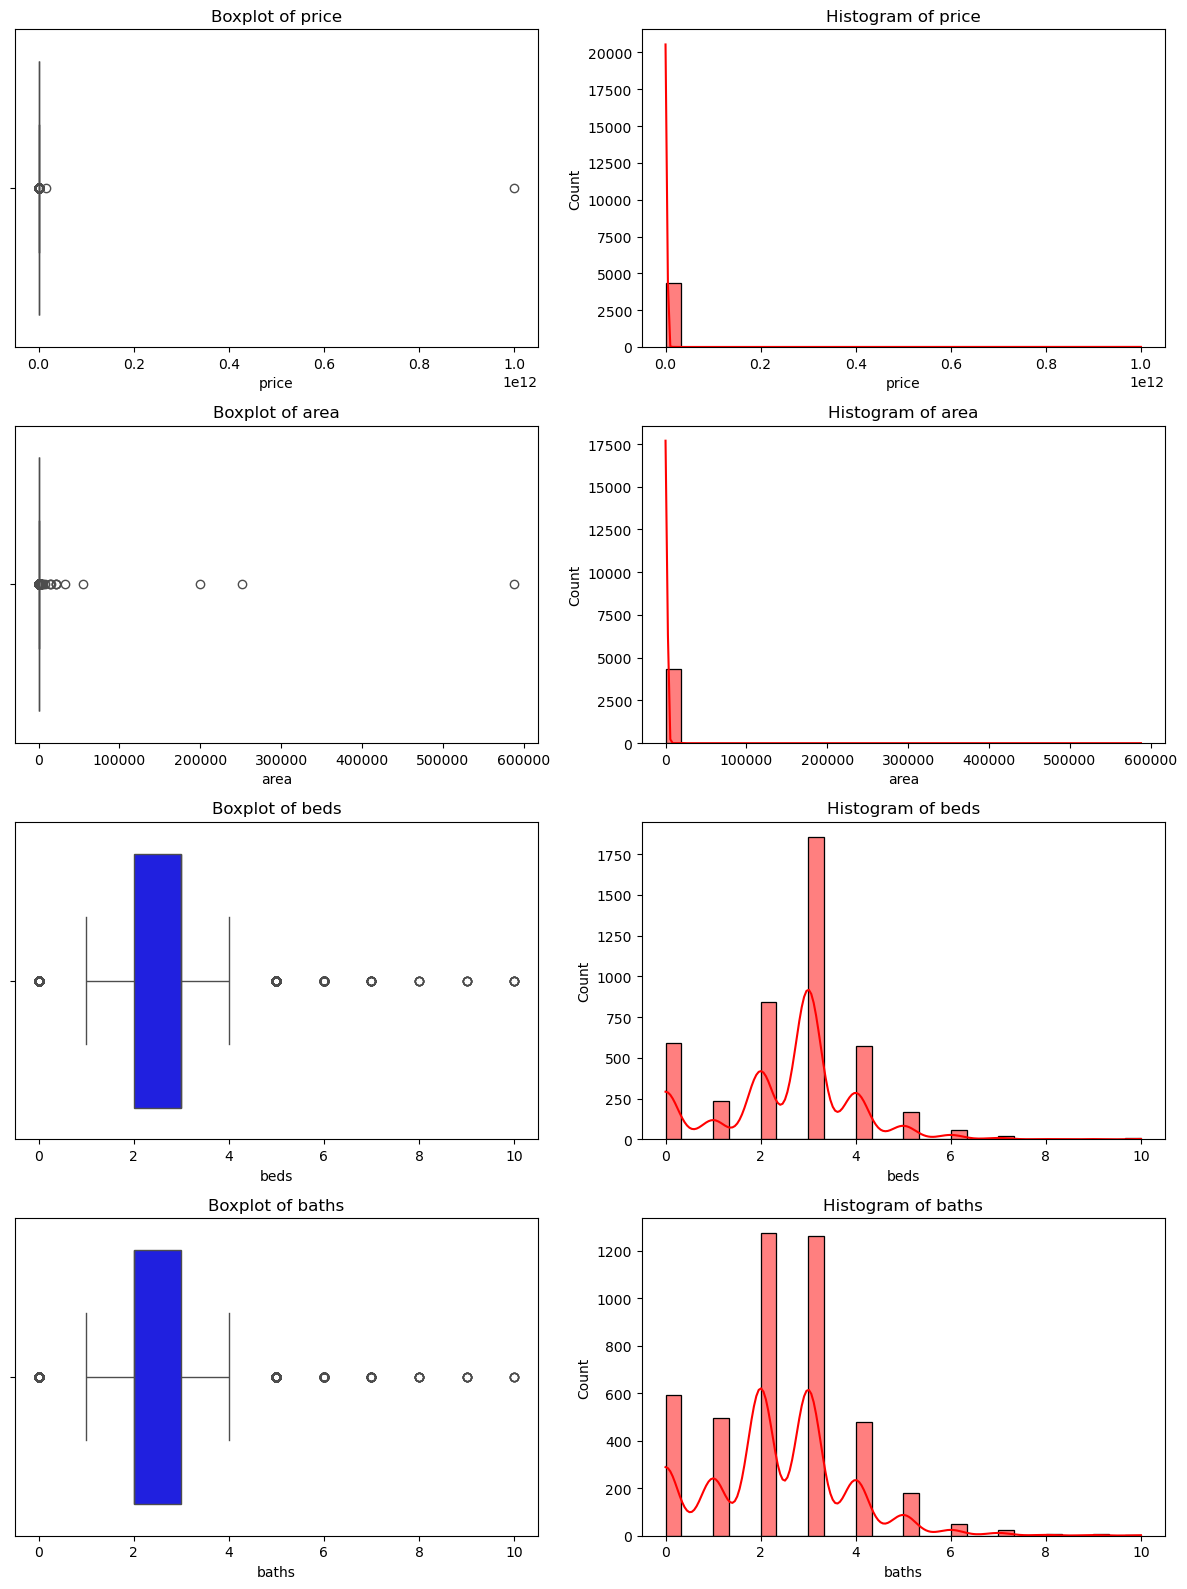

In [51]:
fig, axes = plt.subplots(len(numerical), 2, figsize=(12, 4 * len(numerical)))

for i, col in enumerate(numerical):
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Boxplot of {col}')
    # Histogram
    sns.histplot(df[col], bins=30, ax=axes[i, 1], kde=True, color='r')
    axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [88]:
Q1_price = df['price'].quantile(0.25) 
Q3_price = df['price'].quantile(0.75)  
IQR_price = Q3_price - Q1_price      

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = df[
    (df['price'] >= lower_bound_price) & 
    (df['price'] <= upper_bound_price)
]

Q1_area = df_cleaned['area'].quantile(0.25)
Q3_area = df_cleaned['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

df_cleaned = df_cleaned[
    (df_cleaned['area'] >= lower_bound_area) & 
    (df_cleaned['area'] <= upper_bound_area)
]

Q1_area = df_cleaned['baths'].quantile(0.25)
Q3_area = df_cleaned['baths'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

df_cleaned = df_cleaned[
    (df_cleaned['baths'] >= lower_bound_area) & 
    (df_cleaned['baths'] <= upper_bound_area)
]

Q1_area = df_cleaned['beds'].quantile(0.25)
Q3_area = df_cleaned['beds'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

df_cleaned = df_cleaned[
    (df_cleaned['beds'] >= lower_bound_area) & 
    (df_cleaned['beds'] <= upper_bound_area)
]
print(f"الحجم الأصلي للبيانات (Original Size): {len(df)} صف")
print(f"الحجم بعد تنظيف Outliers (Cleaned Size): {len(df_cleaned)} صف")
print(f"تمت إزالة: {len(df) - len(df_cleaned)} صف")

df = df_cleaned.copy()

الحجم الأصلي للبيانات (Original Size): 3797 صف
الحجم بعد تنظيف Outliers (Cleaned Size): 3108 صف
تمت إزالة: 689 صف


## Data Visualization

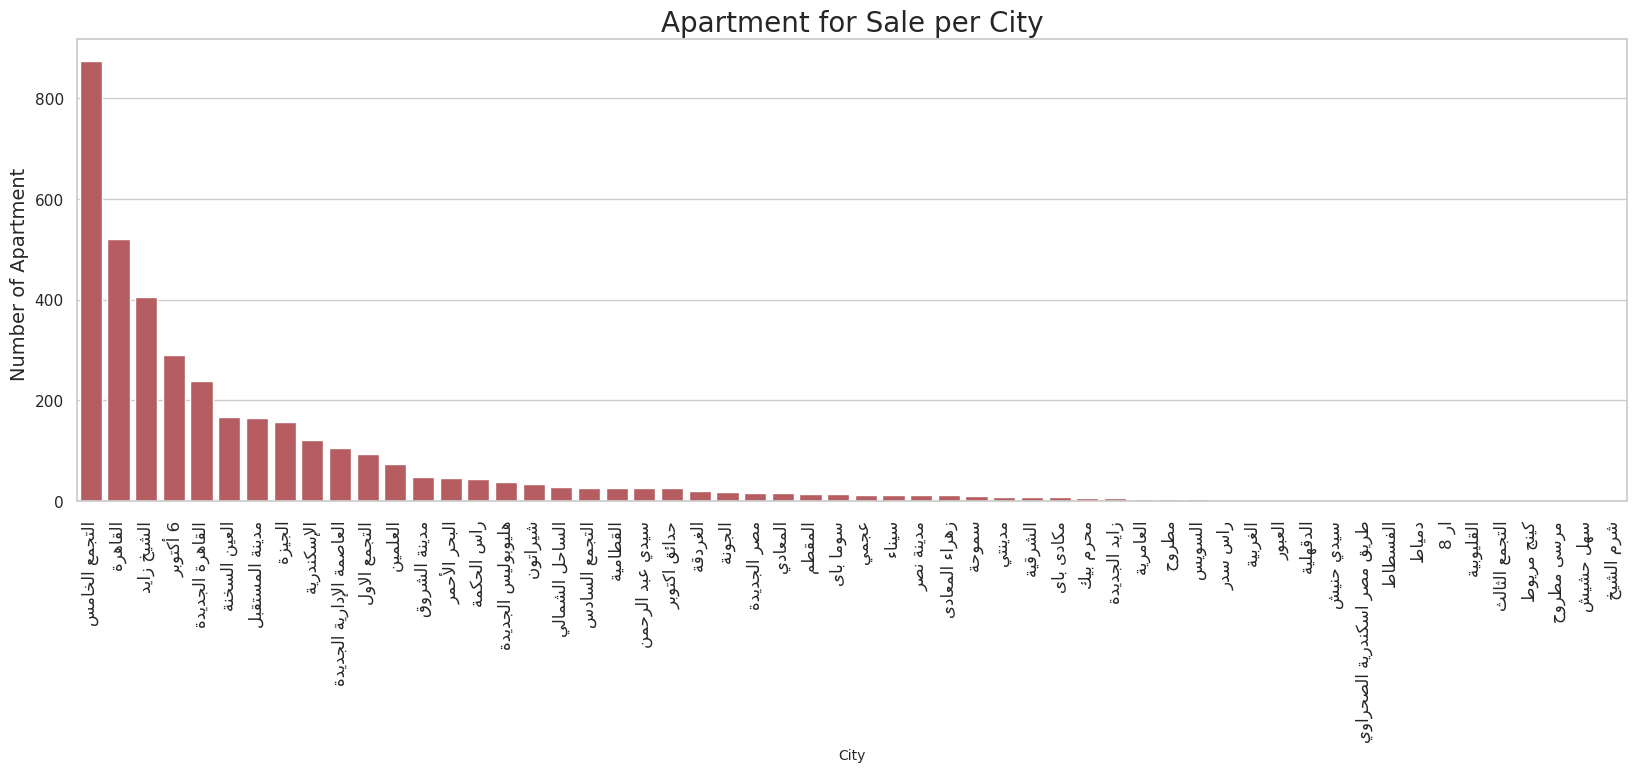

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


city_counts=df["city_display"].value_counts()

plt.figure(figsize=(20,6))
sns.barplot(x=city_counts.index, y=city_counts.values,color="r")
plt.xticks(rotation=90, fontsize=12)  
plt.ylabel('Number of Apartment ', fontsize=14)
plt.xlabel('City', fontsize=10)
plt.title('Apartment for Sale per City', fontsize=20)
plt.show()

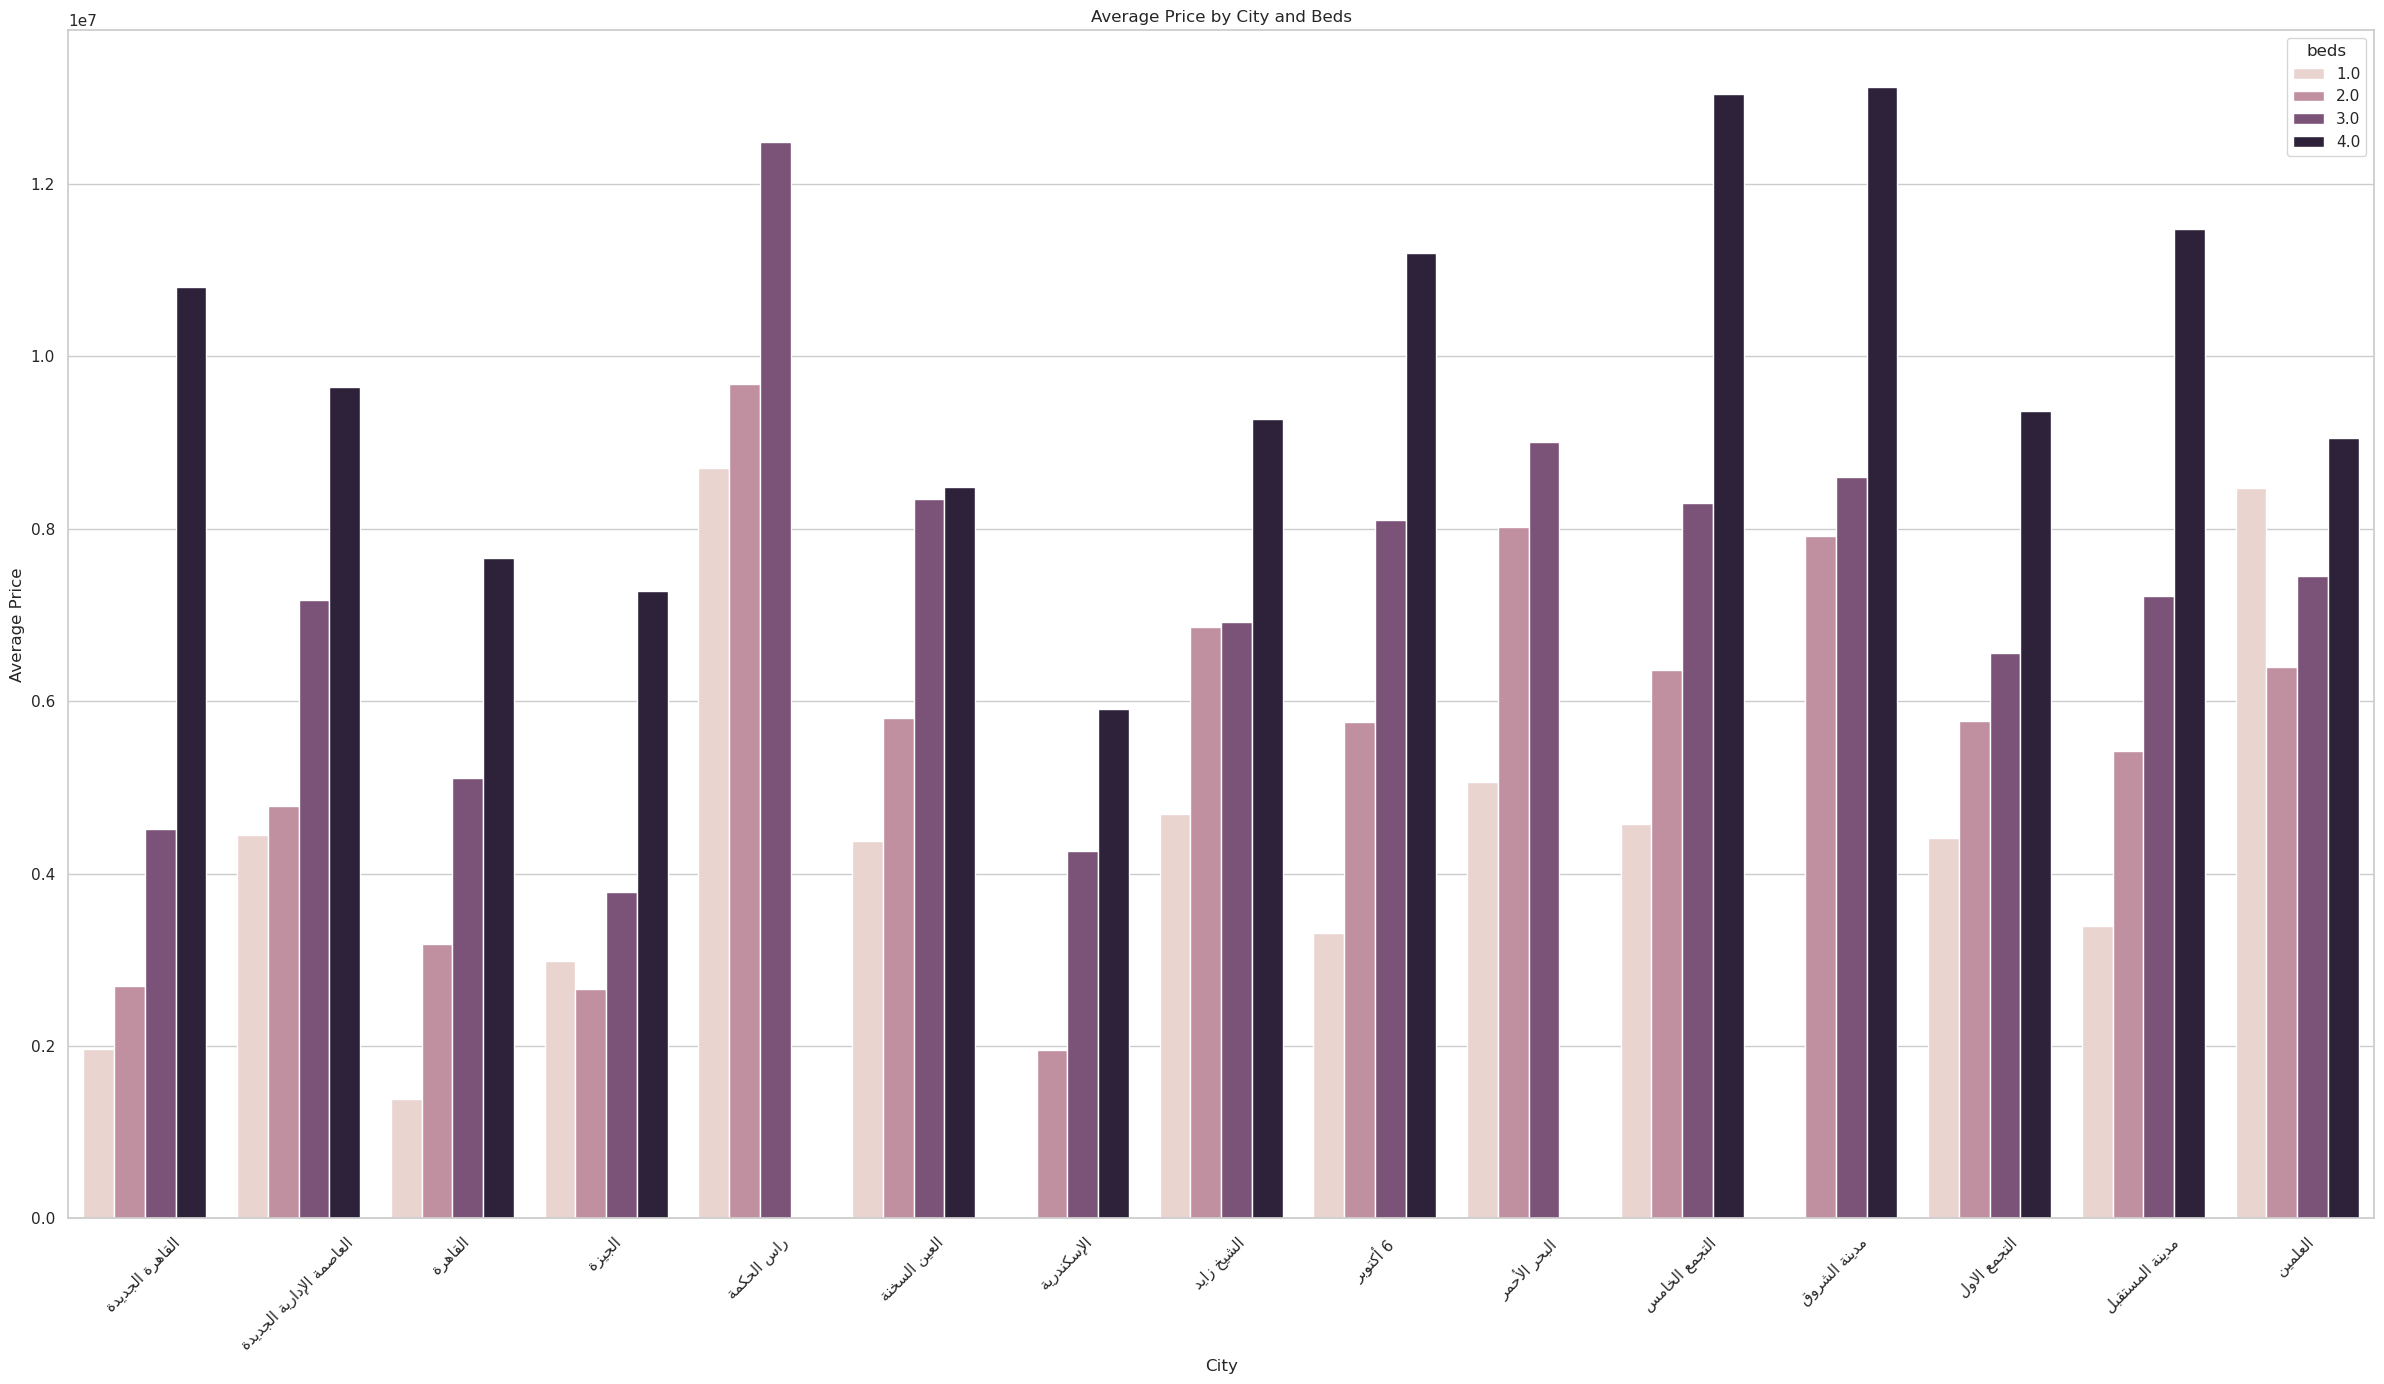

In [113]:
top_cities = df['city_display'].value_counts().head(15).index
group = df[df['city_display'].isin(top_cities)].groupby(['city_display', 'beds'])['price'].mean().reset_index()
plt.figure(figsize=(24,14))
sns.barplot(data=group, x='city_display', y='price', hue='beds')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price by City and Beds')
plt.tight_layout()
plt.show()


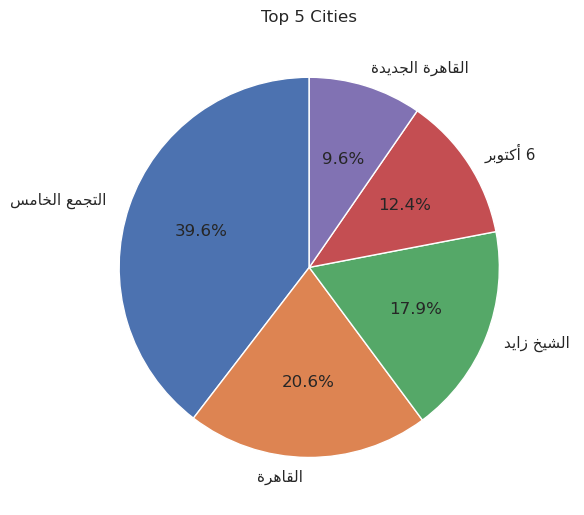

In [112]:
top5 = df['city_display'].value_counts().head(5)
plt.figure(figsize=(6, 6))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Cities")
plt.tight_layout()
plt.show()

,beds,price
0,1.0,4.479973e+06
1,2.0,5.725586e+06
2,3.0,7.115756e+06
3,4.0,1.053603e+07


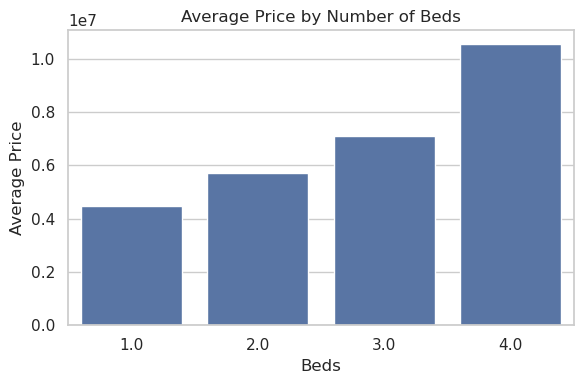

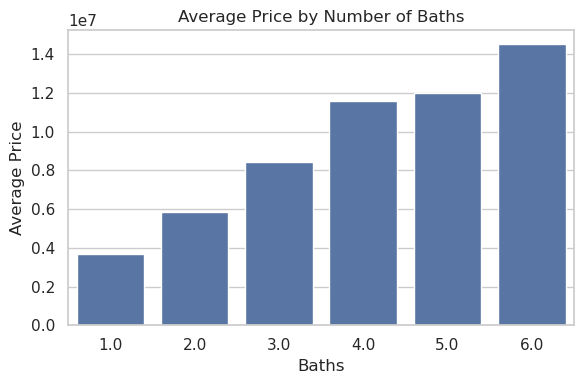

In [114]:
beds_price = df.groupby('beds')['price'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=beds_price, x='beds', y='price')
plt.xlabel('Beds')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Beds')
plt.tight_layout()
plt.show()


baths_price = df.groupby('baths')['price'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=baths_price, x='baths', y='price')
plt.xlabel('Baths')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Baths')
plt.tight_layout()
plt.show()


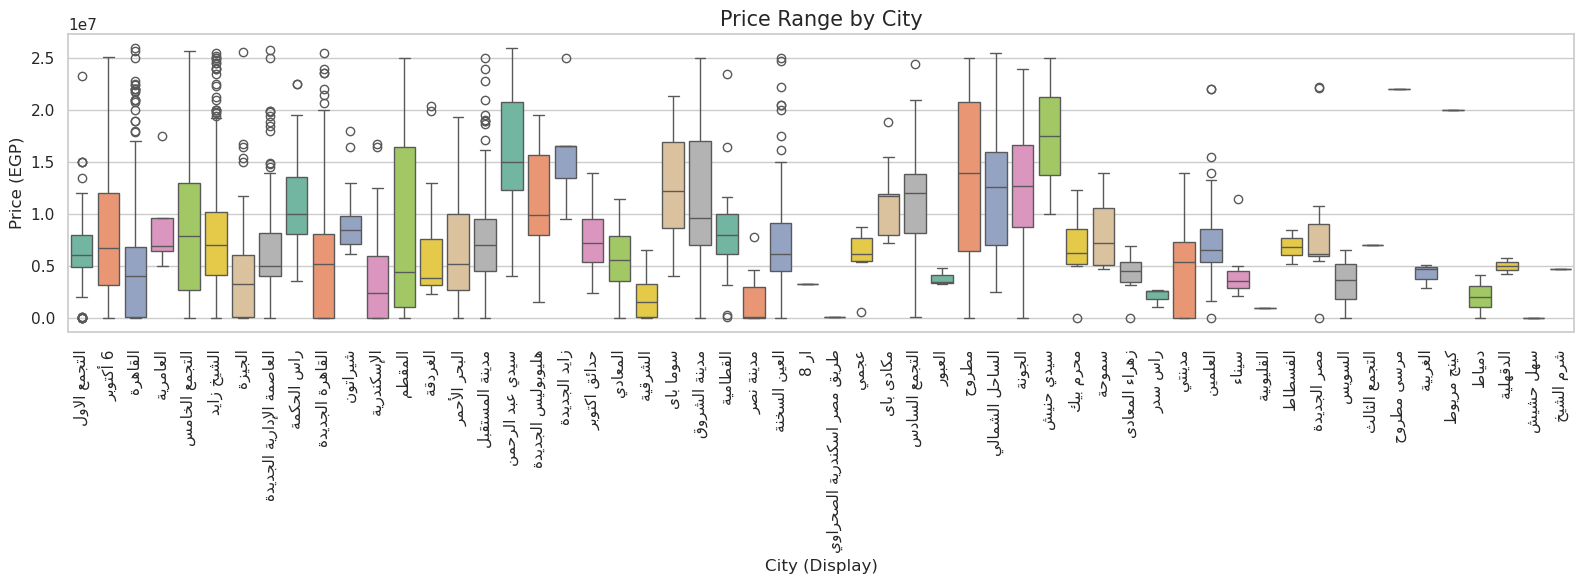

In [76]:
plt.figure(figsize=(16, 6)) 

sns.boxplot(
    data=df, 
    x='city_display', 
    y='price', 
    palette="Set2",
    hue='city_display', 
    legend=False
)

plt.title('Price Range by City', fontsize=15)
plt.xlabel('City (Display)', fontsize=12)
plt.ylabel('Price (EGP)', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

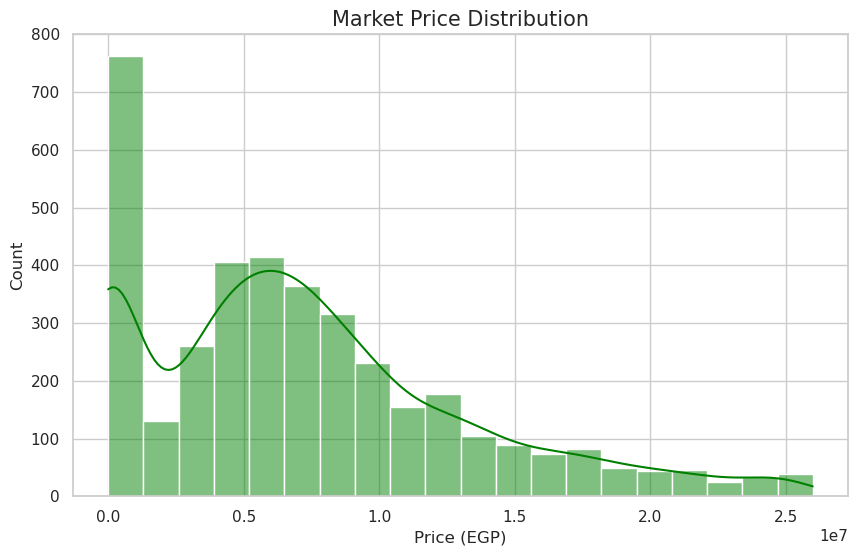

In [77]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df['price'], 
    kde=True, 
    color='green', 
    bins=20
)

plt.title('Market Price Distribution', fontsize=15)
plt.xlabel('Price (EGP)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

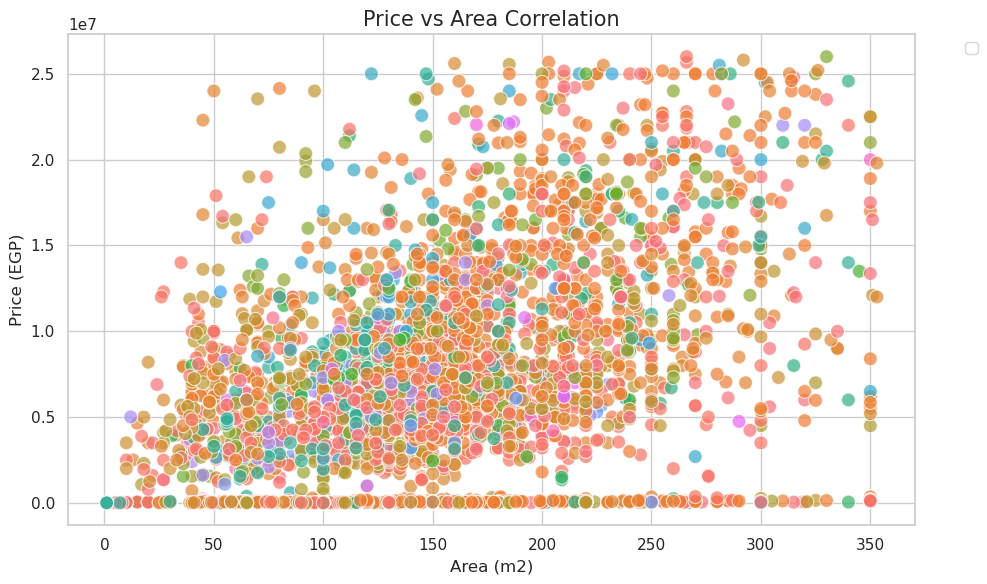

In [78]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(
    data=df, 
    x='area', 
    y='price', 
    hue='city_display', 
    s=100, 
    alpha=0.7,
    legend=False
)

plt.title('Price vs Area Correlation', fontsize=15)
plt.xlabel('Area (m2)', fontsize=12)
plt.ylabel('Price (EGP)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

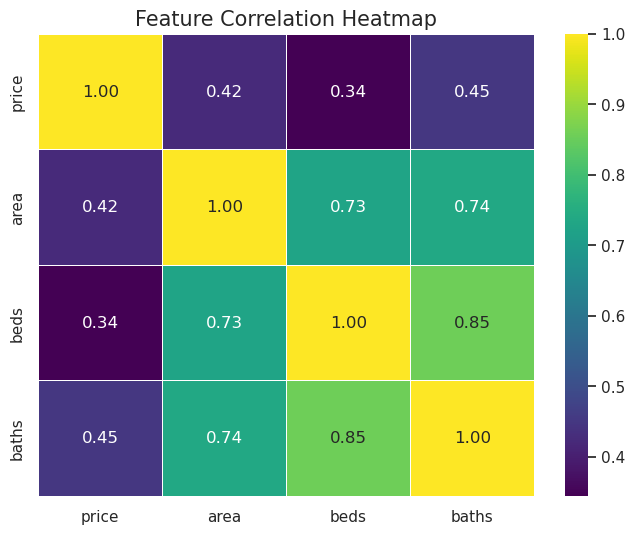

In [79]:
plt.figure(figsize=(8, 6))

corr = df[['price', 'area', 'beds', 'baths']].corr()

sns.heatmap(
    corr, 
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=.5
)

plt.title('Feature Correlation Heatmap', fontsize=15)
plt.show()

## Data Modeling

In [81]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 1.4 MB/s  0:00:06m 1.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 1.3 MB/s  0:00:27 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


compound_mean_price = df.groupby('compound')['price'].transform('mean')


df['Compound_Value'] = compound_mean_price


features = ['area', 'beds', 'baths', "Compound_Value"]
target = 'price'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error - MSE: {mse:.2f}")
print(f"R-squared - R²: {r2:.2f}")

Mean Squared Error - MSE: 11226230881481.37
R-squared - R²: 0.51


In [111]:

rf_model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1, max_depth=16)

rf_model.fit(X_train, y_train)


rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("--- نتائج Random Forest ---")
print(f"(MSE): {rf_mse:.2f}")
print(f"(RMSE): {np.sqrt(rf_mse):.2f}")
print(f"(R-squared - R²): {rf_r2:.2f}")

--- نتائج Random Forest ---
(MSE): 11962140435405.81
(RMSE): 3458632.74
(R-squared - R²): 0.48
